In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import logging

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from icecream import ic

from dataclasses import dataclass, field
import heapq
import time

In [4]:
debug = False

logger = logging.getLogger()
logger.setLevel(logging.DEBUG if debug else logging.INFO)
logging.debug("Debugging started")

Cost: $d + (d \cdot \alpha \cdot w)^\beta$ with $\alpha \ge 0$ and $\beta \ge 0$


In [13]:
from src.problem import Problem, calc_solution_cost, print_path_steps
from src.multistar_v1 import MultiStar
from src.grandtoursplit import (
    find_grand_tour,
    cluster_solve,
    genetic_algorithm,
    ExtProblem,
)

In [14]:
P = Problem(num_cities=40, density=0.8, alpha=1.0, beta=1.0)
# P.plot()

In [7]:
lower_bound = P.lower_bound()
baseline, baseline_path = P.baseline()
print(f"Lower Bound: {lower_bound} - Baseline: {baseline}")

INFO:root:dummy_solution: total cost: 8960.62


Lower Bound: 6920.875035514388 - Baseline: 8960.623029697885


### Why are the best results obtained when each city is its own cluster? What's the difference between this and the baseline solution?


In [22]:
P_ext = ExtProblem(P)

In [23]:
sol, cl, _ = cluster_solve(P_ext)
calc_solution_cost(sol, P)

np.float64(6947.577666597184)

In [28]:
P_ext.cache_miss

44

In [20]:
genetic_algorithm(P_ext, population_size=100, generations=200)

INFO:root:Generation 0: best cost = 6947.5776665971825 with state [Cluster(nodes=[1]), Cluster(nodes=[2]), Cluster(nodes=[3]), Cluster(nodes=[18, 4]), Cluster(nodes=[5]), Cluster(nodes=[6]), Cluster(nodes=[7]), Cluster(nodes=[8]), Cluster(nodes=[9]), Cluster(nodes=[10]), Cluster(nodes=[11]), Cluster(nodes=[12]), Cluster(nodes=[14]), Cluster(nodes=[15]), Cluster(nodes=[16]), Cluster(nodes=[13, 17]), Cluster(nodes=[19]), Cluster(nodes=[20]), Cluster(nodes=[24, 21]), Cluster(nodes=[22]), Cluster(nodes=[23]), Cluster(nodes=[25]), Cluster(nodes=[26]), Cluster(nodes=[27]), Cluster(nodes=[32, 28]), Cluster(nodes=[29]), Cluster(nodes=[33, 30]), Cluster(nodes=[31]), Cluster(nodes=[34]), Cluster(nodes=[35]), Cluster(nodes=[36]), Cluster(nodes=[37]), Cluster(nodes=[38]), Cluster(nodes=[39])] - cache hits: 161633, misses: 32427
INFO:root:Generation 1: best cost = 6947.5776665971825 with state [Cluster(nodes=[1]), Cluster(nodes=[2]), Cluster(nodes=[3]), Cluster(nodes=[18, 4]), Cluster(nodes=[5]), C

KeyboardInterrupt: 

In [ ]:
np.float64(6947.577666597184)

np.float64(6947.577666597184)

In [ ]:
sizes = [20, 50, 100, 200]
times = []
for size in sizes:
    P = Problem(num_cities=size, density=0.8, alpha=1.0, beta=1.0)
    start = time.time()
    sol, cl = cluster_solve(P)
    end = time.time()
    times.append(end - start)
    cost = calc_solution_cost(sol, P)
    print(f"Size: {size} - Time: {end - start:.2f}s - Cost: {cost}")

Size: 20 - Time: 0.06s - Cost: 3967.854783849768
Size: 50 - Time: 2.07s - Cost: 8890.353383889249
Size: 100 - Time: 14.29s - Cost: 18294.88099737023
Size: 200 - Time: 222.88s - Cost: 36617.661562827765


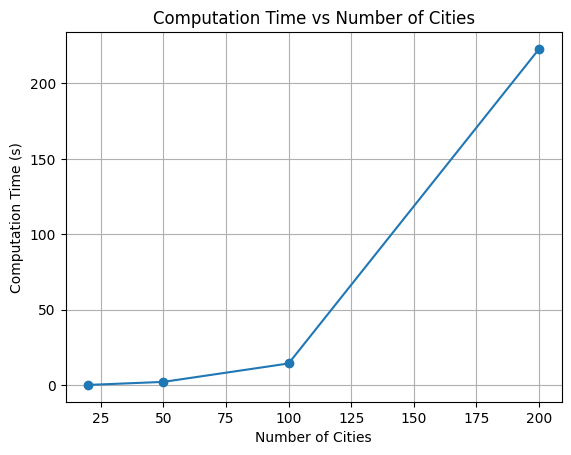

In [ ]:
plt.plot(sizes, times, marker="o")
plt.xlabel("Number of Cities")
plt.ylabel("Computation Time (s)")
plt.title("Computation Time vs Number of Cities")
plt.grid(True)
plt.show()

In [ ]:
# Fit a curve (e.g., polynomial) to the data
coefficients = np.polyfit(sizes, times, deg=3)
polynomial = np.poly1d(coefficients)
print("Polynomial function:\n", polynomial)

Polynomial function:
            3           2
5.588e-05 x - 0.00728 x + 0.3586 x - 4.642


In [ ]:
polynomial(1000) / 3600

np.float64(13.597484802603816)

In [ ]:
cluster_path, clusters = cluster_solve(P)
print(cluster_path)
print(calc_solution_cost(cluster_path, P))

KeyboardInterrupt: 

In [ ]:
mst = nx.minimum_spanning_tree(P.graph, weight="dist")

In [ ]:
len(P.graph.edges(data=True))

400058

In [ ]:
len(mst.edges(data=True))

999

In [ ]:
nx.floyd_warshall_numpy(P.graph, weight="dist")

array([[0.        , 0.40932457, 0.62522716, ..., 0.25496935, 0.27089097,
        0.34628162],
       [0.40932457, 0.        , 0.81348895, ..., 0.38741999, 0.67834415,
        0.17776469],
       [0.62522716, 0.81348895, 0.        , ..., 0.44099538, 0.66842872,
        0.87881971],
       ...,
       [0.25496935, 0.38741999, 0.44099538, ..., 0.        , 0.45989051,
        0.43795738],
       [0.27089097, 0.67834415, 0.66842872, ..., 0.45989051, 0.        ,
        0.59032265],
       [0.34628162, 0.17776469, 0.87881971, ..., 0.43795738, 0.59032265,
        0.        ]], shape=(1000, 1000))

In [ ]:
nx.floyd_warshall_numpy(mst, weight="dist")

array([[0.        , 1.64696239, 0.94089588, ..., 0.88390129, 1.06366294,
        2.06730411],
       [1.64696239, 0.        , 1.5163602 , ..., 0.82565057, 1.98554558,
        1.08734713],
       [0.94089588, 1.5163602 , 0.        , ..., 0.75329909, 1.27947907,
        1.93670192],
       ...,
       [0.88390129, 0.82565057, 0.75329909, ..., 0.        , 1.22248447,
        1.24599229],
       [1.06366294, 1.98554558, 1.27947907, ..., 1.22248447, 0.        ,
        2.40588729],
       [2.06730411, 1.08734713, 1.93670192, ..., 1.24599229, 2.40588729,
        0.        ]], shape=(1000, 1000))

In [ ]:
from src.grandtoursplit import build_simplified_tree


simpl = build_simplified_tree(P.graph)

KeyboardInterrupt: 

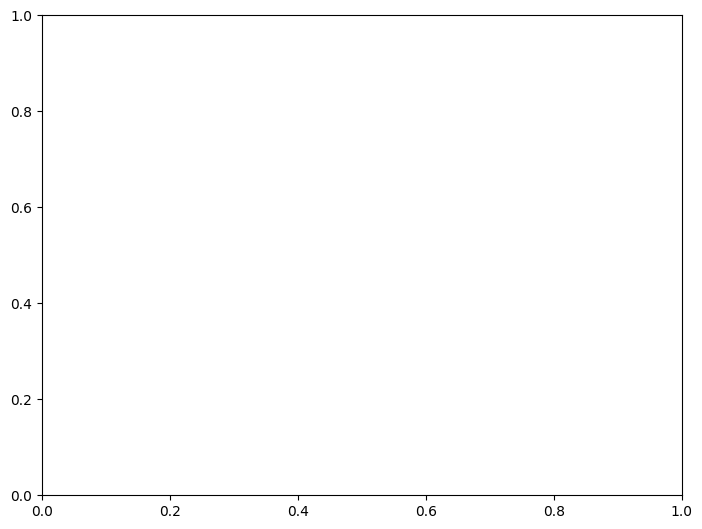

In [ ]:
nx.draw(P.graph, with_labels=True)
plt.show()

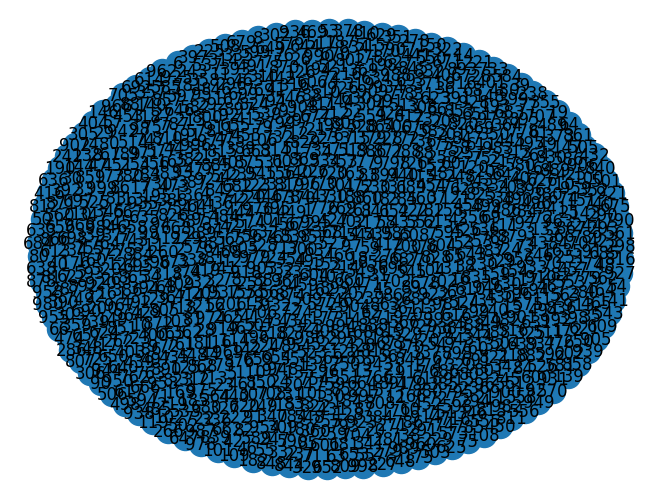

In [ ]:
nx.draw(simpl, with_labels=True)
plt.show()

In [ ]:
clusters

[Cluster(nodes={1}, path=[0, 1, 0], cost=319.1206672270921),
 Cluster(nodes={2}, path=[0, 2, 0], cost=608.8800689077007),
 Cluster(nodes={3}, path=[0, 3, 0], cost=194.92155191867397),
 Cluster(nodes={4}, path=[0, 4, 0], cost=55.05921174261351),
 Cluster(nodes={5}, path=[0, 5, 0], cost=7.545575856399501),
 Cluster(nodes={7}, path=[0, 7, 0], cost=37.52056397462102),
 Cluster(nodes={8}, path=[0, 8, 0], cost=298.9093870247961),
 Cluster(nodes={9}, path=[0, 9, 0], cost=44.03500082937054),
 Cluster(nodes={10}, path=[0, 10, 0], cost=150.74578735251296),
 Cluster(nodes={11}, path=[0, 11, 0], cost=427.18479139092244),
 Cluster(nodes={41, 12}, path=[0, 12, 41, 12, 0], cost=621.4398257321614),
 Cluster(nodes={13}, path=[0, 13, 0], cost=92.6599186861274),
 Cluster(nodes={14}, path=[0, 14, 0], cost=315.4173239139976),
 Cluster(nodes={15}, path=[0, 15, 0], cost=378.7303916144516),
 Cluster(nodes={16}, path=[0, 16, 0], cost=160.8988273069369),
 Cluster(nodes={17}, path=[0, 17, 0], cost=41.78746470519

In [ ]:
merged_set = set().union(*(c.nodes for c in clusters.values()))
merged_set.add(0)
assert merged_set == set(range(P.graph.number_of_nodes())), (
    "Clusters do not cover all nodes"
)

In [ ]:
from src.grandtoursplit import catch_gold, ExtProblem


catch_gold(ExtProblem(P), clusters[0]._path, clusters[0].nodes)

KeyError: 0

In [ ]:
print_path_steps(baseline_path, P)

[0] At depot, all gold (0.00kg) unloaded. 0.0
[0] Taking 0.00kg of gold - leaving 0.00kg out of previous 0.00kg
[0->1] Moving from 0 to 1 with 0.00kg of gold - step cost: 0.41
[1] Taking 437.71kg of gold - leaving 0.00kg out of previous 437.71kg
[1->0] Moving from 1 to 0 with 437.71kg of gold - step cost: 179.58
[0] At depot, all gold (437.71kg) unloaded. 437.7147669534584
[0] Taking 0.00kg of gold - leaving 0.00kg out of previous 0.00kg
[0->10] Moving from 0 to 10 with 0.00kg of gold - step cost: 0.30
[10] Taking 140.61kg of gold - leaving 0.00kg out of previous 140.61kg
[10->0] Moving from 10 to 0 with 140.61kg of gold - step cost: 41.95
[0] At depot, all gold (140.61kg) unloaded. 140.6127311257005
[0] Taking 0.00kg of gold - leaving 0.00kg out of previous 0.00kg
[0->16] Moving from 0 to 16 with 0.00kg of gold - step cost: 0.22
[16] Taking 780.95kg of gold - leaving 0.00kg out of previous 780.95kg
[16->0] Moving from 16 to 0 with 780.95kg of gold - step cost: 169.73
[0] At depot, all

### Can i manually improve the "cluster" solution?


In [ ]:
cluster_path = [
    (0, 0),
    (1, np.float64(437.7147669534584)),
    (0, 0),
    (16, np.float64(0.0)),
    (5, np.float64(0.0)),
    (2, np.float64(832.8455178617796)),
    (5, np.float64(0.0)),
    (16, np.float64(0.0)),
    (0, 0),
    (10, np.float64(0.0)),
    (15, np.float64(0.0)),
    (3, np.float64(700.5648369002469)),
    (15, np.float64(0.0)),
    (10, np.float64(0.0)),
    (0, 0),
    (16, np.float64(0.0)),
    (5, np.float64(0.0)),
    (4, np.float64(313.054274740659)),
    (5, np.float64(0.0)),
    (16, np.float64(0.0)),
    (0, 0),
    (16, np.float64(0.0)),
    (5, np.float64(832.4275415938058)),
    (16, np.float64(0.0)),
    (0, 0),
    (1, np.float64(0.0)),
    (9, np.float64(0.0)),
    (6, np.float64(804.9595931393051)),
    (9, np.float64(0.0)),
    (1, np.float64(0.0)),
    (0, 0),
    (16, np.float64(0.0)),
    (13, np.float64(0.0)),
    (8, np.float64(0.0)),
    (7, np.float64(388.0909006511443)),
    (8, np.float64(0.0)),
    (13, np.float64(0.0)),
    (16, np.float64(0.0)),
    (0, 0),
    (16, np.float64(0.0)),
    (13, np.float64(0.0)),
    (8, np.float64(289.03977582631387)),
    (13, np.float64(0.0)),
    (16, np.float64(0.0)),
    (0, 0),
    (1, np.float64(0.0)),
    (9, np.float64(682.8130084710006)),
    (1, np.float64(0.0)),
    (0, 0),
    (10, np.float64(140.6127311257005)),
    (0, 0),
    (1, np.float64(0.0)),
    (9, np.float64(0.0)),
    (11, np.float64(200.70829427263322)),
    (9, np.float64(0.0)),
    (1, np.float64(0.0)),
    (0, 0),
    (1, np.float64(0.0)),
    (12, np.float64(8.354907481254507)),
    (1, np.float64(0.0)),
    (0, 0),
    (16, np.float64(0.0)),
    (13, np.float64(787.1374531246363)),
    (16, np.float64(0.0)),
    (0, 0),
    (10, np.float64(0.0)),
    (19, np.float64(0.0)),
    (14, np.float64(665.1860057354401)),
    (19, np.float64(0.0)),
    (10, np.float64(0.0)),
    (0, 0),
    (10, np.float64(0.0)),
    (15, np.float64(705.4602132477088)),
    (10, np.float64(0.0)),
    (0, 0),
    (16, np.float64(780.9483019909459)),
    (0, 0),
    (16, np.float64(0.0)),
    (17, np.float64(459.4568597628016)),
    (16, np.float64(0.0)),
    (0, 0),
    (16, np.float64(0.0)),
    (17, np.float64(0.0)),
    (18, np.float64(569.1724547569409)),
    (17, np.float64(0.0)),
    (16, np.float64(0.0)),
    (0, 0),
    (10, np.float64(0.0)),
    (19, np.float64(140.6572011295298)),
    (10, np.float64(0.0)),
    (0, 0),
]
calc_solution_cost(cluster_path, P)

np.float64(7330.745373832982)

In [ ]:
cluster_path = [
    (0, 0),
    (1, np.float64(437.7147669534584)),
    (0, 0),
    (16, np.float64(0.0)),
    (5, np.float64(0.0)),
    (2, np.float64(832.8455178617796)),
    (5, np.float64(0.0)),
    (16, np.float64(0.0)),
    (0, 0),
    (10, np.float64(0.0)),
    (15, np.float64(0.0)),
    (3, np.float64(700.5648369002469)),
    (15, np.float64(0.0)),
    (10, np.float64(0.0)),
    (0, 0),
    (16, np.float64(0.0)),
    (5, np.float64(0.0)),
    (4, np.float64(313.054274740659)),
    (5, np.float64(0.0)),
    (16, np.float64(780.9483019909459)),
    (0, 0),
    (16, np.float64(0.0)),
    (5, np.float64(832.4275415938058)),
    (16, np.float64(0.0)),
    (0, 0),
    (1, np.float64(0.0)),
    (9, np.float64(0.0)),
    (6, np.float64(804.9595931393051)),
    (9, np.float64(0.0)),
    (1, np.float64(0.0)),
    (0, 0),
    (16, np.float64(0.0)),
    (13, np.float64(0.0)),
    (8, np.float64(0.0)),
    (7, np.float64(388.0909006511443)),
    (8, np.float64(0.0)),
    (13, np.float64(0.0)),
    (16, np.float64(0.0)),
    (0, 0),
    (16, np.float64(0.0)),
    (13, np.float64(0.0)),
    (8, np.float64(289.03977582631387)),
    (13, np.float64(0.0)),
    (16, np.float64(0.0)),
    (0, 0),
    (1, np.float64(0.0)),
    (9, np.float64(682.8130084710006)),
    (1, np.float64(0.0)),
    (0, 0),
    (1, np.float64(0.0)),
    (9, np.float64(0.0)),
    (11, np.float64(200.70829427263322)),
    (9, np.float64(0.0)),
    (1, np.float64(0.0)),
    (0, 0),
    (1, np.float64(0.0)),
    (12, np.float64(8.354907481254507)),
    (1, np.float64(0.0)),
    (0, 0),
    (16, np.float64(0.0)),
    (13, np.float64(787.1374531246363)),
    (16, np.float64(0.0)),
    (0, 0),
    (10, np.float64(0.0)),
    (19, np.float64(0.0)),
    (14, np.float64(665.1860057354401)),
    (19, np.float64(0.0)),
    (10, np.float64(0.0)),
    (0, 0),
    (10, np.float64(0.0)),
    (15, np.float64(705.4602132477088)),
    (10, np.float64(0.0)),
    (0, 0),
    (16, np.float64(0.0)),
    (17, np.float64(459.4568597628016)),
    (16, np.float64(0.0)),
    (0, 0),
    (16, np.float64(0.0)),
    (17, np.float64(0.0)),
    (18, np.float64(569.1724547569409)),
    (17, np.float64(0.0)),
    (16, np.float64(0.0)),
    (0, 0),
    (10, np.float64(0.0)),
    (19, np.float64(140.6572011295298)),
    (10, np.float64(140.6127311257005)),
    (0, 0),
]
calc_solution_cost(cluster_path, P)

np.float64(7329.718715835747)

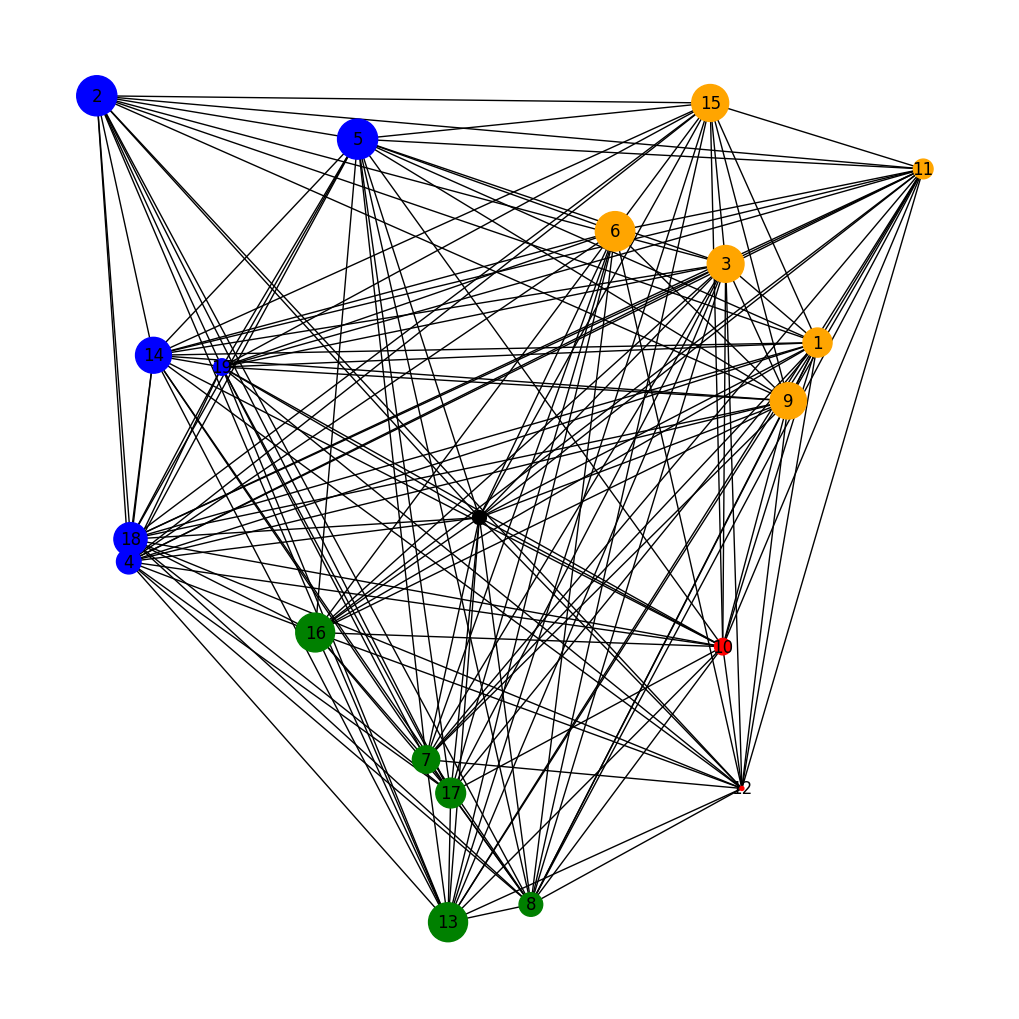

In [ ]:
def plot_clusters(self, km):
    plt.figure(figsize=(10, 10))
    pos = nx.get_node_attributes(self._graph, "pos")
    size = [100] + [self._graph.nodes[n]["gold"] for n in range(1, len(self._graph))]
    colors = ["red", "blue", "green", "orange", "purple", "brown", "pink", "gray"]
    color = ["black"] + [colors[km.labels_[n]] for n in range(len(km.labels_))]
    return nx.draw(
        self._graph,
        pos,
        with_labels=True,
        node_color=color,
        node_size=size,
        arrows=True,
        arrowsize=300,
    )


plot_clusters(P, km)

In [ ]:
tours, gold_tours = find_grand_tour(P, trials=1000)
print(np.min([c for t, c in tours]))
print(np.min([c for t, c in gold_tours]))

6.953908883342598
3961.6015899033328


In [ ]:
min_tour_idx = np.argmin([c for t, c in gold_tours])
recalc_cost(gold_tours[min_tour_idx][0])

NameError: name 'gold_tours' is not defined

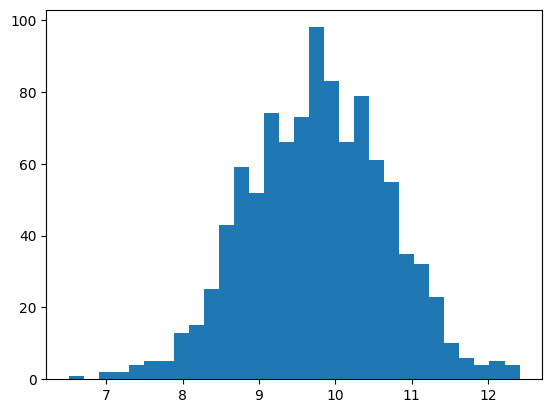

In [ ]:
costs = [c for _, c in tours]
plt.hist(costs, bins=30)
plt.show()

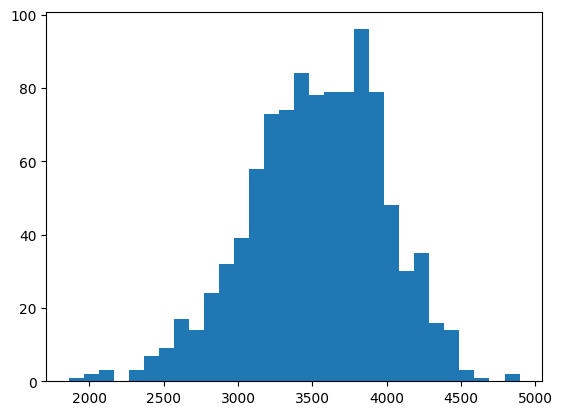

In [ ]:
gold_costs = [c for _, c in gold_tours]
plt.hist(gold_costs, bins=30)
plt.show()

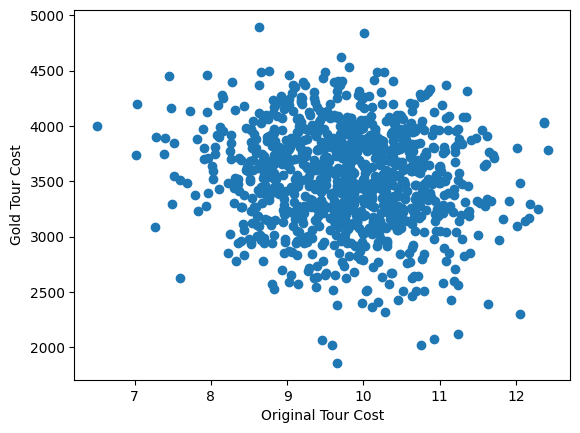

Correlation between original tour cost and gold tour cost: -0.1223473922431559


In [ ]:
plt.scatter(costs, gold_costs)
plt.xlabel("Original Tour Cost")
plt.ylabel("Gold Tour Cost")
plt.show()

corr = np.corrcoef(costs, gold_costs)[0, 1]
print(f"Correlation between original tour cost and gold tour cost: {corr}")

It seems like the original tour cost does not correlate at all with the gold tour cost.


In [ ]:
MultiStar(P)

Iteration 100 | Heap size: 8224 | Heap lengths: 3/32.5/83 | Heap remaining gold-cities: 1/26.0/49 | Heap f_scores: 8546.08/18595.95/31044.39 | Best path: 8928.58509978 with len 80 at iter 92 
Iteration 200 | Heap size: 12193 | Heap lengths: 3/48.9/86 | Heap remaining gold-cities: 1/17.8/49 | Heap f_scores: 8546.23/15325.34/31044.39 | Best path: 8928.58509978 with len 80 at iter 92 
Iteration 300 | Heap size: 16231 | Heap lengths: 3/57.4/87 | Heap remaining gold-cities: 1/13.7/49 | Heap f_scores: 8546.27/13639.37/31044.39 | Best path: 8928.58509978 with len 80 at iter 92 
Iteration 400 | Heap size: 20254 | Heap lengths: 3/62.6/87 | Heap remaining gold-cities: 1/11.1/49 | Heap f_scores: 8546.29/12628.19/31044.39 | Best path: 8928.58509978 with len 80 at iter 92 
Iteration 500 | Heap size: 24268 | Heap lengths: 3/66.1/88 | Heap remaining gold-cities: 1/9.5/49 | Heap f_scores: 8546.31/11953.50/31044.39 | Best path: 8928.58509978 with len 80 at iter 92 
Iteration 600 | Heap size: 28259 | He

KeyboardInterrupt: 

## How do the shortest distances between all nodes look like?


size=20, density=0.2, distance: 0.0726/0.7339/1.4621
size=20, density=1.0, distance: 0.0254/0.5298/1.0383
size=250, density=0.2, distance: 0.0043/0.5515/1.2916
size=250, density=1.0, distance: 0.0015/0.5175/1.2916


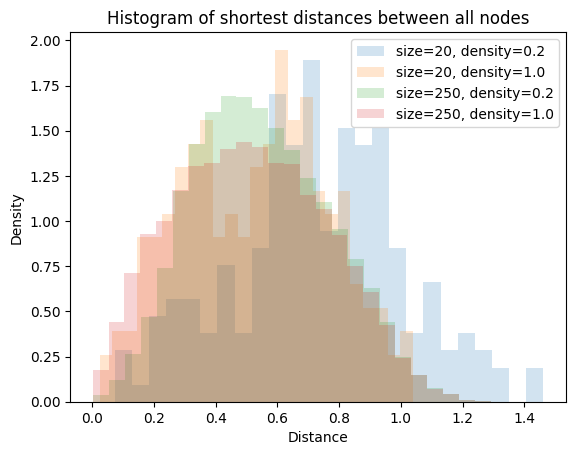

In [ ]:
for size in [20, 250]:
    for density in [0.2, 1.0]:
        P = Problem(num_cities=size, density=density, alpha=1.0, beta=1.0)

        shortest_dists = nx.floyd_warshall_numpy(P.graph, weight="dist")
        for i in range(size):
            shortest_dists[i, i] = np.nan  # ignore zero distances to self
        shortest_dists = shortest_dists.flatten()
        shortest_dists = shortest_dists[~np.isnan(shortest_dists)]
        plt.hist(
            shortest_dists,
            bins=25,
            alpha=0.2,
            density=True,
            label=f"size={size}, density={density}",
        )
        print(
            f"size={size}, density={density}, distance: {shortest_dists.min():.4f}/{shortest_dists.mean():.4f}/{shortest_dists.max():.4f}"
        )

plt.legend()
plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("Histogram of shortest distances between all nodes")
plt.show()

In [ ]:
print(f"Baseline: {P.baseline()}")
print(f"Lower bound: {P.lower_bound()}")

Baseline: 18943.690307011868
Lower bound: 12870.468997523243


In [ ]:
logging.getLogger().setLevel(logging.WARNING)

# ic(Problem(100, density=0.2, alpha=1, beta=1).baseline())
# ic(Problem(100, density=0.2, alpha=2, beta=1).baseline())
# ic(Problem(100, density=0.2, alpha=1, beta=2).baseline())
# ic(Problem(100, density=1, alpha=1, beta=1).baseline())
# ic(Problem(100, density=1, alpha=2, beta=1).baseline())
# ic(Problem(100, density=1, alpha=1, beta=2).baseline())
# ic(Problem(1_000, density=0.2, alpha=1, beta=1).baseline())
# ic(Problem(1_000, density=0.2, alpha=2, beta=1).baseline())
# ic(Problem(1_000, density=0.2, alpha=1, beta=2).baseline())
# ic(Problem(1_000, density=1, alpha=1, beta=1).baseline())
# ic(Problem(1_000, density=1, alpha=2, beta=1).baseline())
# ic(Problem(1_000, density=1, alpha=1, beta=2).baseline())
None

In [ ]:
@dataclass(order=True)
class SearchState:
    f_score: float
    path: list[tuple[int, float]] = field(compare=False)
    cum_dist: float = field(compare=False)
    remaining_gold: np.ndarray = field(compare=False)
    current_gold: float = field(compare=False)

    def last_node(self) -> int:
        return self.path[-1][0]


H_len_power = 0.65
H_scale = 40


# Keep variables global for debugging
open_heap = []
g_scores = None
best_fitness = np.inf
best_path = None
best_iteration = None


def MultiStar(
    problem: Problem,
    heap_size_limit: int = 100_000,
    heap_size_keep: int = 80_000,
    iteration_limit: int = 10_000,
    early_stop_fitness: float = None,
    random_takes: int = 2,
    print_every: int = 100,
):
    rng = np.random.default_rng(seed=42)
    N = problem.graph.number_of_nodes()
    avg_step_dist = 0.5 + (problem.alpha * 0.5 * 500.5) ** problem.beta

    precompute_paths_to_base: list[tuple[list[int], float]] = [([], 0)]
    for n in range(1, N):
        path = nx.shortest_path(problem.graph, source=n, target=0, weight="dist")
        dist = nx.path_weight(problem.graph, path, weight="dist")
        precompute_paths_to_base.append((path, dist))

    # Heuristic function
    # Deeply intertwined with the queue cleanup strategy
    def H(
        current: SearchState,
        next_node: int,
        cum_dist: float,
        remaining_gold: np.ndarray,
        amount: float,
    ) -> float:
        # Note that the distance between cities is always between 0 and 1, and gold in each city is between 1 and 1000

        # ne_count = len(list(problem.graph.neighbors(next_node)))

        remaining_gold_cities = np.count_nonzero(remaining_gold)

        return (
            cum_dist
            # + remaining_gold.sum()
            + remaining_gold_cities * avg_step_dist * N * 0.8
            # - (ne_count - 1) / N * avg_step_dist * 2
            - problem.cost_from_dist(
                precompute_paths_to_base[next_node][1],
                current.current_gold + amount,
            )
            * (((1000 - amount) / 1000) * 0.5 + 0.4)
            # - amount
            # if (amount > 0 and remaining_gold[next_node] == 0)
            # else 0
        )

    # problem_std = problem[np.isfinite(problem)].std()

    # The data structure for open should ideally allow
    # O(1) retrieval of the minimum f_score node,
    # and O(1) check if it contains a node by its index.
    global open_heap, best_fitness, best_path, best_iteration
    open_heap = [
        SearchState(
            0, [(0, 0.0)], 0, np.array([n["gold"] for n in P.graph.nodes.values()]), 0.0
        )
    ]
    heapq.heapify(open_heap)

    best_fitness = np.inf
    best_path = None

    i = 0

    while open_heap and i < iteration_limit:
        current = heapq.heappop(open_heap)

        if current.cum_dist >= best_fitness:
            continue

        for ne in problem.graph.neighbors(current.last_node()):
            if ne == 0:
                # Unload current gold
                new_path = current.path + [(0, 0)]
                cum_dist = current.cum_dist + problem.cost(
                    [current.last_node(), 0], current.current_gold
                )
                f_score = H(
                    current,
                    ne,
                    cum_dist,
                    current.remaining_gold,
                    0,
                )
                heapq.heappush(
                    open_heap,
                    SearchState(
                        f_score,
                        new_path,
                        cum_dist,
                        current.remaining_gold,
                        0.0,
                    ),
                )

                continue

            amounts = [0]
            if current.remaining_gold[ne] > 0:
                # How much gold can we take from this city? multiple branches: take 0, n random take, take all
                amounts = [0, current.remaining_gold[ne]]
                if current.remaining_gold[ne] > 2 and random_takes > 0:
                    amounts += list(
                        rng.uniform(
                            1, current.remaining_gold[ne] - 1, size=random_takes
                        )
                    )

            for amount in amounts:
                new_current_gold = current.current_gold + amount
                new_path = current.path + [(int(ne), amount)]
                cum_dist = current.cum_dist + problem.cost(
                    [current.last_node(), ne], current.current_gold
                )
                remaining_gold = current.remaining_gold.copy()
                remaining_gold[ne] -= amount

                if remaining_gold[ne] == 0 and remaining_gold.sum() == 0:
                    # Return to (0, 0)
                    return_path = precompute_paths_to_base[ne][0]
                    new_path = current.path + [(n, 0) for n in return_path[1:]]
                    cum_dist = current.cum_dist + problem.cost2(
                        return_path, new_current_gold
                    )
                    # Completed solution
                    if cum_dist < best_fitness:
                        best_fitness = cum_dist
                        best_path = new_path
                        best_iteration = i
                        # print(
                        #     f"New best path with fitness {best_fitness:.8f} at iteration {i}, path len {len(best_path)}"
                        # )
                        if (
                            early_stop_fitness is not None
                            and best_fitness <= early_stop_fitness
                        ):
                            print(
                                f"Early stopping at iteration {i} with fitness {best_fitness:.8f}"
                            )
                            return best_path, best_fitness, best_iteration
                    continue

                f_score = H(current, ne, cum_dist, remaining_gold, amount)
                heapq.heappush(
                    open_heap,
                    SearchState(
                        f_score,
                        new_path,
                        cum_dist,
                        remaining_gold,
                        new_current_gold,
                    ),
                )

        i += 1
        if i % print_every == 0:
            heap_lengths = [len(s.path) + 1 for s in open_heap]
            heap_f_scores = [s.f_score for s in open_heap]
            heap_remaining_nonzero = [
                np.count_nonzero(s.remaining_gold) for s in open_heap
            ]
            heap_size = len(open_heap)
            print(
                f"Iteration {i} | Heap size: {heap_size} | "
                f"Heap lengths: {np.min(heap_lengths)}/{np.mean(heap_lengths):.1f}/{np.max(heap_lengths)} | "
                f"Heap remaining gold-cities: {np.min(heap_remaining_nonzero)}/{np.mean(heap_remaining_nonzero):.1f}/{np.max(heap_remaining_nonzero)} | "
                f"Heap f_scores: {np.min(heap_f_scores):.2f}/{np.mean(heap_f_scores):.2f}/{np.max(heap_f_scores):.2f} | "
                f"Best path: {best_fitness:.8f} with len {len(best_path) if best_path else None} at iter {best_iteration} "
            )

        if len(open_heap) > heap_size_limit:
            # Benchmark how long this takes
            curr_heap_size = len(open_heap)
            start_time = time.time()
            new_heap = []
            while len(new_heap) < heap_size_keep and open_heap:
                s = heapq.heappop(open_heap)
                if np.isfinite(best_fitness) and s.cum_dist >= best_fitness:
                    continue
                heapq.heappush(new_heap, s)
            end_time = time.time()
            print(
                f"Pruned heap from size {curr_heap_size} to {len(new_heap)} in {end_time - start_time:.2f} seconds"
            )
            open_heap = new_heap

    return best_path, best_fitness, best_iteration

In [ ]:
MultiStar(
    P,
    random_takes=0,
    print_every=1000,
    heap_size_limit=300_000,
    heap_size_keep=200_000,
    iteration_limit=1_000_000,
)

Iteration 1000 | Heap size: 11066 | Heap lengths: 3/50.9/71 | Heap remaining gold-cities: 2/6.7/49 | Heap f_scores: 192125.49/214621.26/491470.05 | Best path: inf with len None at iter None 
Iteration 2000 | Heap size: 21863 | Heap lengths: 3/52.0/73 | Heap remaining gold-cities: 2/5.7/49 | Heap f_scores: 191718.46/210805.95/491470.05 | Best path: inf with len None at iter None 
Iteration 3000 | Heap size: 32512 | Heap lengths: 3/52.8/73 | Heap remaining gold-cities: 2/5.4/49 | Heap f_scores: 193722.80/209449.83/491470.05 | Best path: inf with len None at iter None 
Iteration 4000 | Heap size: 43514 | Heap lengths: 3/53.2/75 | Heap remaining gold-cities: 2/5.2/49 | Heap f_scores: 195509.35/209019.04/491470.05 | Best path: inf with len None at iter None 
Iteration 5000 | Heap size: 54047 | Heap lengths: 3/53.4/75 | Heap remaining gold-cities: 2/5.1/49 | Heap f_scores: 192638.72/208486.65/491470.05 | Best path: inf with len None at iter None 
Iteration 6000 | Heap size: 64445 | Heap leng

KeyboardInterrupt: 

In [ ]:
best_state = heapq.nsmallest(1, open_heap)[0]
best_state

SearchState(f_score=np.float64(28405.208384008376), path=[(0, 0.0), (16, np.float64(780.9483019909459)), (13, np.float64(787.1374531246363)), (8, np.float64(289.03977582631387)), (7, np.float64(388.0909006511443)), (6, np.float64(804.9595931393051)), (5, np.float64(832.4275415938058)), (2, np.float64(832.8455178617796)), (4, np.float64(313.054274740659)), (3, np.float64(700.5648369002469)), (15, np.float64(705.4602132477088)), (11, np.float64(200.70829427263322)), (9, np.float64(682.8130084710006)), (1, np.float64(437.7147669534584)), (0, 0), (10, np.float64(140.6127311257005)), (19, np.float64(140.6572011295298)), (18, 0), (12, 3.7410433071958864), (18, 0), (17, 0), (18, 0), (17, 18.580031824739045), (18, 0), (12, np.float64(4.613864174058621)), (18, 0), (17, 0), (18, 145.09087406980697), (17, 0), (18, 55.340383929072026), (17, 37.48949902207288), (18, 0), (17, 0), (18, 72.34466170192951), (17, 29.93783740501327)], cum_dist=np.float64(24843.364189110842), remaining_gold=array([  0.   

In [ ]:
best_state.remaining_gold

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        , 665.18600574,   0.        ,
         0.        , 373.44949151, 296.39653506,   0.        ])